In [1]:
import geopandas
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

from shapely.affinity import skew,rotate,scale 
from shapely.geometry import Polygon

/home/evelazco/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
ruta_datos_procesados = os.getcwd().replace("Codigo/EDA", "Datos/Procesados/")
df = pd.read_csv(ruta_datos_procesados + 'datos_jobs_finales.csv')

es = geopandas.read_file(ruta_datos_procesados + 'provincias-espanolas.geojson')

In [3]:
df = df[df['pais'] == 'España']

In [4]:
frecuencia_provincias = df['provincia'].value_counts()
frecuencia_provincias['Ceuta'] = 0
frecuencia_provincias['Melilla'] = 0
frecuencia_provincias = frecuencia_provincias.sort_index()

In [5]:
len(frecuencia_provincias)

52

In [6]:
len(es.sort_values(by="provincia")["geometry"])

52

### Funciones:

In [7]:
def get_x(geo_df):
    return (geo_df.centroid.apply(lambda p:p.x).values)
    
def get_y(geo_df):
    return (geo_df.centroid.apply(lambda p:p.y).values)

def scale_linear(A,B,cases): 
    return B+(A-B)*(cases-cases.min())/(cases.max()-cases.min())



### Guardar la lista frecuencia_provincias para no cargarla cada vez

In [8]:
os.environ['SHAPE_RESTORE_SHX'] = 'YES'

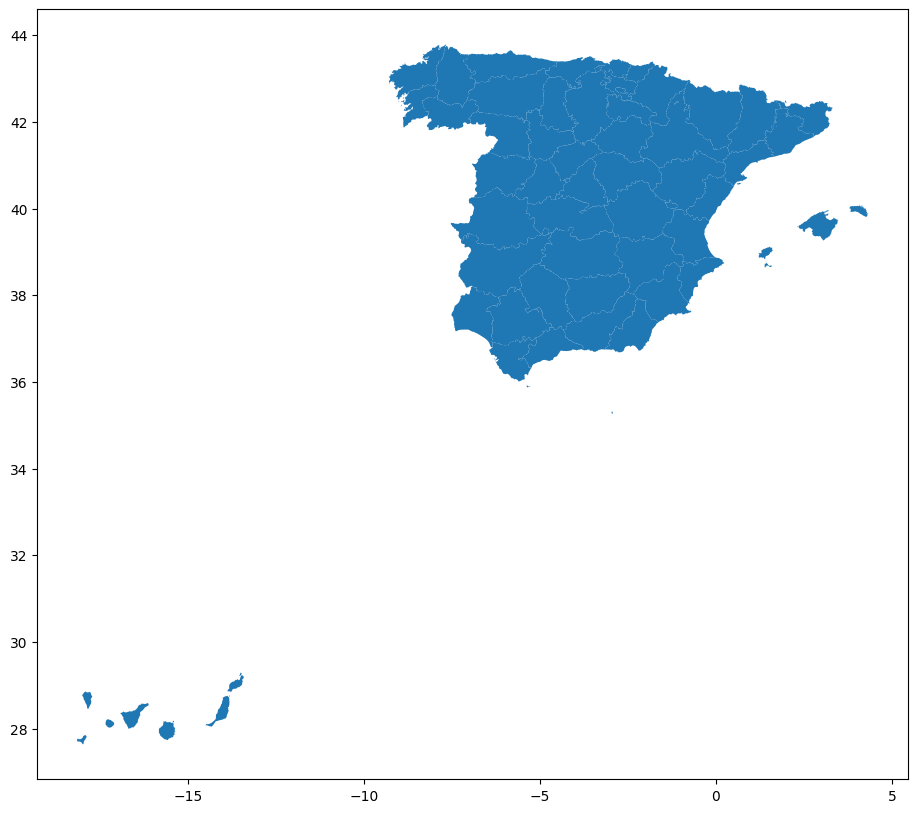

In [9]:
fig,ax = plt.subplots(1,1,figsize=(16,10))
es.plot(ax=ax)
plt.show()

<Axes: >

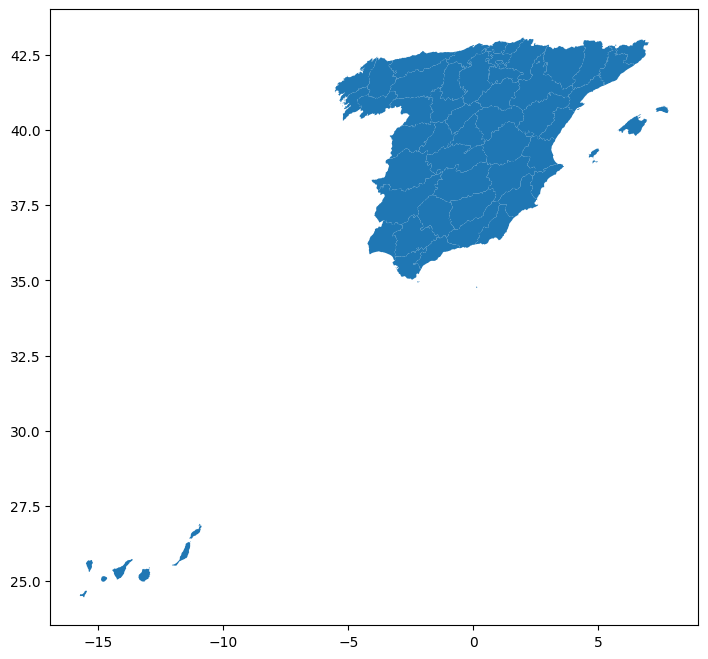

In [10]:
# Asignando centroides
x0 = 0
y0 = 0
# Configurando el canvas en matplotlib y
# creando un objeto "axes"
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
(es["geometry"]
 .skew(xs=5, ys=10, use_radians=False, origin=(x0, y0))
 .rotate(angle=0, use_radians=False, origin=(x0, y0))
 .plot(ax=ax))

In [11]:
x_ = np.random.uniform(1, 10, [56])

/tmp/ipykernel_8905/295328345.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  .centroid
/tmp/ipykernel_8905/295328345.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  .centroid


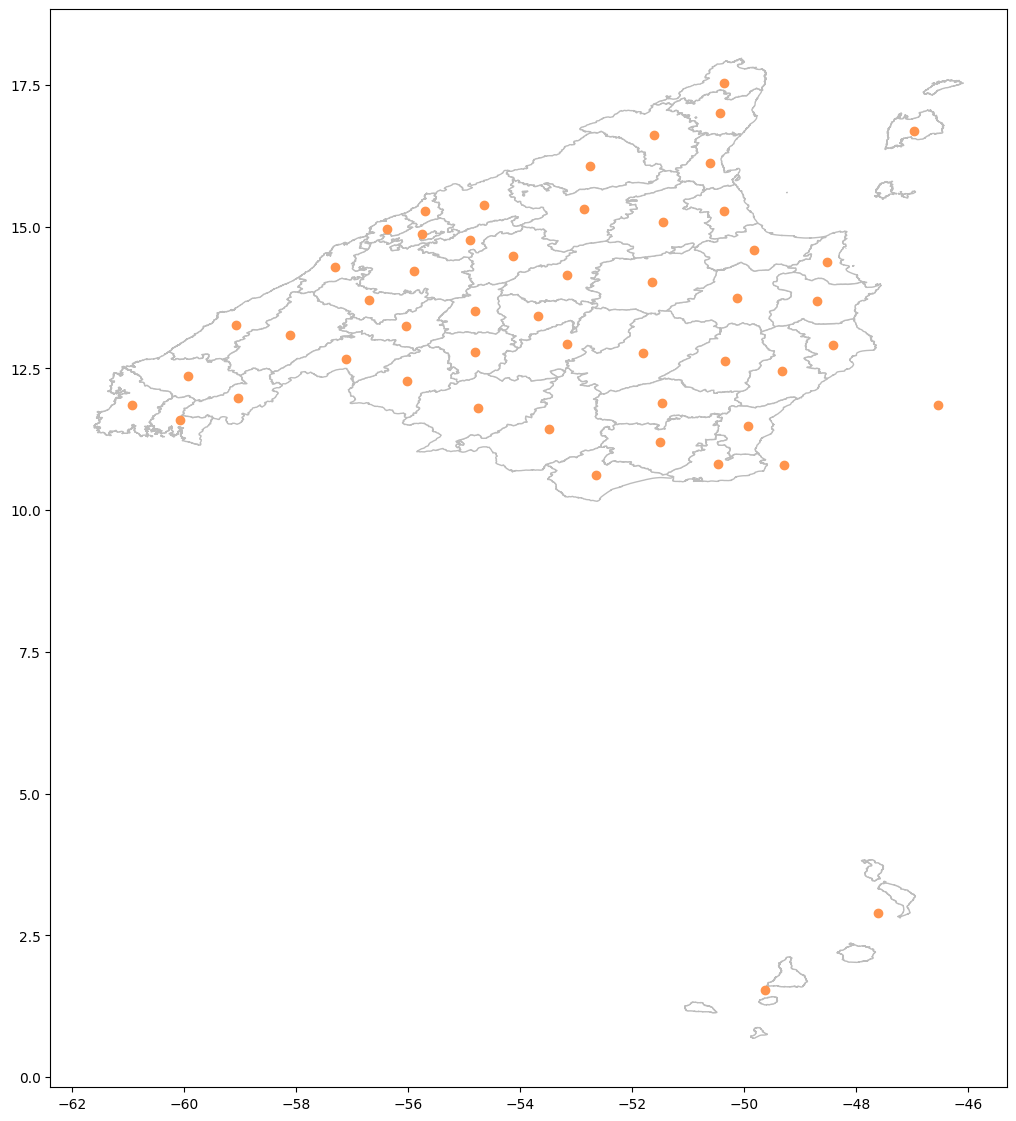

In [12]:
es_tr = (es["geometry"]
           .skew(xs=-40,ys=0,use_radians=False,origin=(x0,y0))
           .rotate(angle=33,use_radians=False,origin=(x0,y0)))

x=(es_tr
   .centroid
   .apply(lambda p:p.x)
   .values)

y=(es_tr
   .centroid
   .apply(lambda p:p.y)
   .values)

fig,ax = plt.subplots(1,1,figsize=(14,14))
#Graficando el mapa
es_tr.plot(ax=ax,
            color="#ffffff",
            edgecolor="#bcbcbc",
            zorder=1)

#Mostrando la posición de las coordenadas
ax.scatter(x=x,
           y=y,
           color="#ff944d")
plt.show()

In [13]:
len(frecuencia_provincias)

52

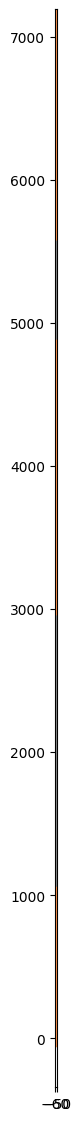

In [14]:
fig,ax = plt.subplots(1,1,figsize=(14,14))
#Graficando el mapa
es_tr.plot(ax=ax,
            color="#ffffff",
            edgecolor="#bcbcbc",
            zorder=1)
#Mostrando la posición de las coordenadas
ax.scatter(x=x,
           y=y+frecuencia_provincias.values,
           color="#ff944d",
           zorder=2,
           s=10*frecuencia_provincias.values)
for i in range(32):
   ax.plot([x,x],
           [y,y+frecuencia_provincias.values],
           color="#8c8c8c",
           zorder=1)
plt.show()

In [15]:
x0 = 0
y0 = 0

In [16]:
es2_5 = (es.sort_values(by="provincia")["geometry"].reset_index(drop=True).skew(xs=5,ys=10,use_radians=False,origin=(x0,y0)).rotate(angle=-20,use_radians=False,origin=(x0,y0)))

In [17]:
def return_plane_coords(map_): 
    def extract_polygon(map_): 
        return Polygon([(map_.total_bounds[0],map_.total_bounds[1]-2), (map_.total_bounds[2]+2,map_.total_bounds[1]-2), (map_.total_bounds[2]+2,map_.total_bounds[3]+2), (map_.total_bounds[0],map_.total_bounds[3]+2)])
    polygon = extract_polygon(map_)
    sk_tr=skew(polygon,xs=5,ys=10,use_radians=False,origin=(x0,y0)) 
    rt_tr=rotate(sk_tr,angle=0,use_radians=False,origin=(x0,y0))
    return (rt_tr .exterior .coords .xy)

/tmp/ipykernel_8905/3495962396.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return (geo_df.centroid.apply(lambda p:p.x).values)
/tmp/ipykernel_8905/3495962396.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return (geo_df.centroid.apply(lambda p:p.y).values)


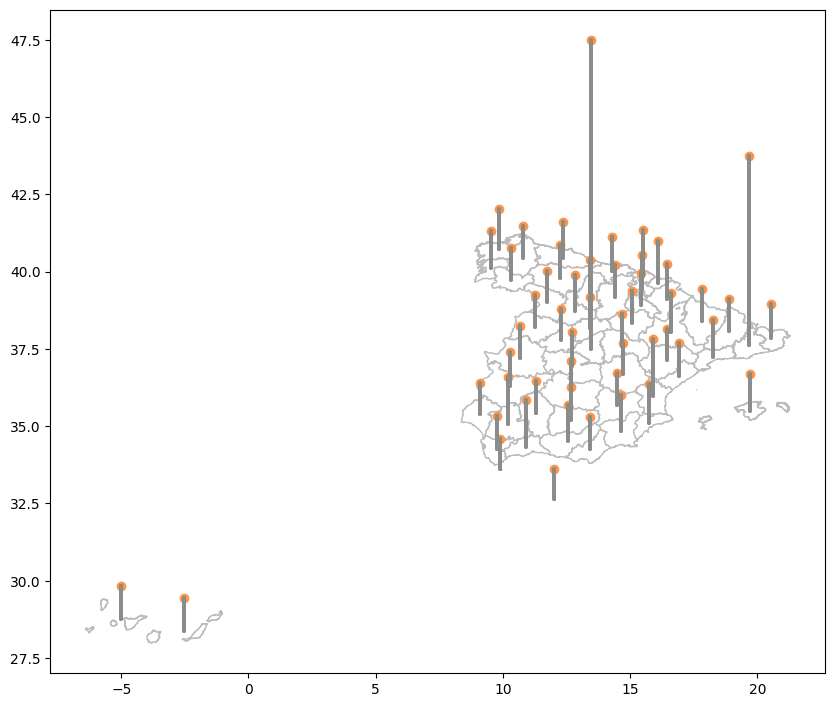

In [18]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
x=get_x(es2_5)
y=get_y(es2_5)
y2 = scale_linear(10,1,frecuencia_provincias)
es2_5.plot(ax=ax,color="#ffffff", edgecolor="#bcbcbc", zorder=1)
ax.scatter(x=x, y=y+y2, color="#ff944d")
#ax.plot(return_plane_coords(es2_5)[0], np.asarray(return_plane_coords(es)[1]), color="#dddddd",zorder=1)
for i in range(52):
    ax.plot([x,x], [y,y+y2], color="#8c8c8c", zorder=1)
plt.show()